In [1]:
# Requirements
# python = 3.6.2
# pynwb = 1.0.1

In [2]:
#################################
# NWB Packages
#################################

import numpy
import pynwb
from pynwb import NWBFile, TimeSeries, get_manager
from pynwb.spec import NWBGroupSpec, NWBDatasetSpec, NWBNamespace
from pynwb.base import ProcessingModule
from pynwb.ecephys import ElectrodeGroup, Device
from pynwb.image import ImageSeries
from pynwb.core import set_parents
from pynwb import *
from datetime import datetime
from pynwb import NWBFile #, TimeSeries, get_manager

In [3]:
#################################
# neo Packages
#################################

import neo
from neo import *
print ("neo.__version__ = ", neo.__version__)

import urllib
import numpy as np
import quantities as pq
from matplotlib import pyplot
import matplotlib.pyplot as plt

neo.__version__ =  0.8.0.dev


In [4]:
#################################
# NWB File
# http://download.alleninstitute.org/informatics-archive/prerelease/
# H19.28.012.11.05-3.nwb
#################################

# Read the NWB File
filename = "/home/elodie/NWB_Files/NWB_org/H19.28.012.11.05-3.nwb"
io2 = pynwb.NWBHDF5IO(filename, mode='r')
io2.read_builder()

{'acquisition': {'index_000': {'capacitance_fast': {'attributes': {'unit': 'A'},
    'data': 0.0},
   'capacitance_slow': {'attributes': {'unit': 'Farad'}, 'data': nan},
   'data': {'attributes': {'conversion': 1.0, 'resolution': nan, 'unit': 'A'},
    'data': <HDF5 dataset "data": shape (70000,), type "<f4">},
   'gain': {'attributes': {}, 'data': 5000000.0},
   'resistance_comp_bandwidth': {'attributes': {'unit': 'Hz'}, 'data': nan},
   'resistance_comp_correction': {'attributes': {'unit': 'pecent'},
    'data': nan},
   'resistance_comp_prediction': {'attributes': {'unit': 'pecent'},
    'data': nan},
   'starting_time': {'attributes': {'rate': 199999.99999999997,
     'unit': 'Seconds'},
    'data': 15588.600779},
   'whole_cell_capacitance_comp': {'attributes': {'unit': 'Farad'},
    'data': nan},
   'whole_cell_series_resistance_comp': {'attributes': {'unit': 'Ohm'},
    'data': nan},
   'comments': 'no comments',
   'description': '{\n    "cycle_id": 3001001,\n    "file": "H19.2

fig =  Figure(864x1152)


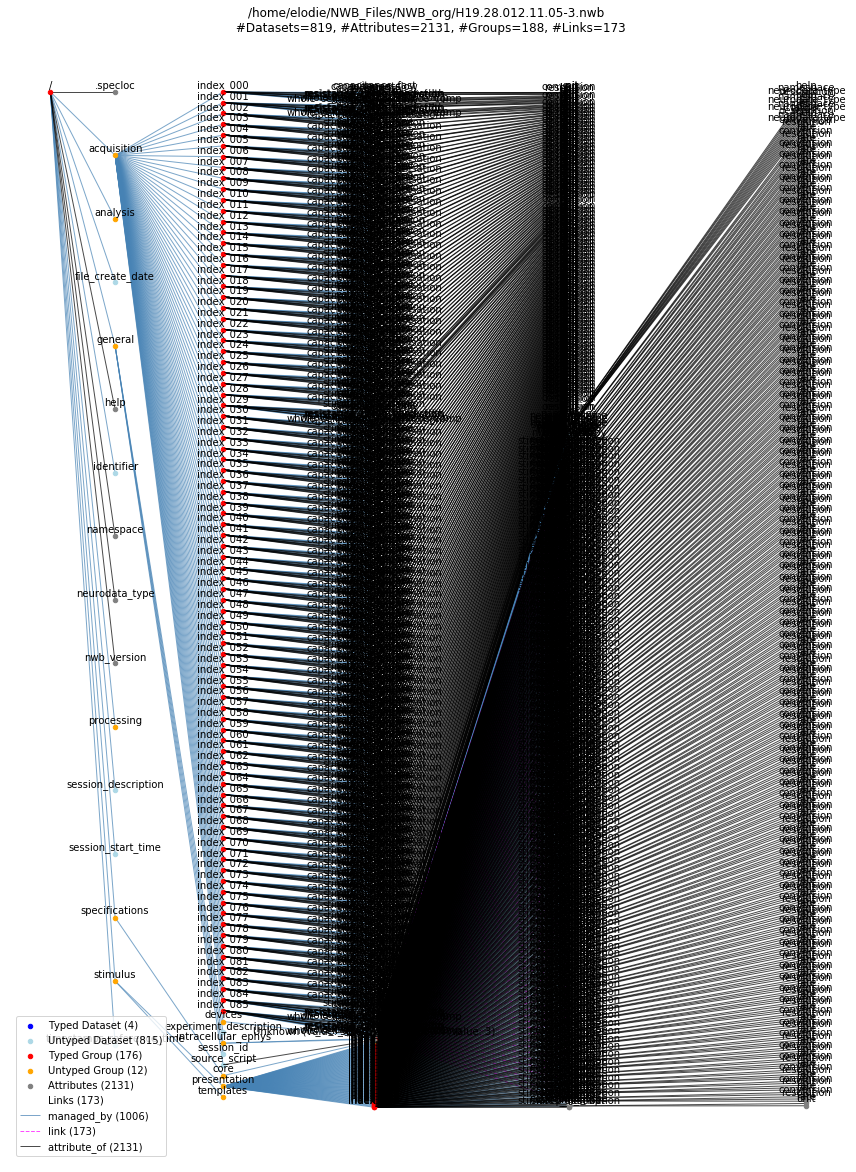

In [5]:
# Plotting settings
show_bar_plot = False    # Change setting to plot distribution of object sizes in the HDF5 file
plot_single_file = True # Plot all files or a single example file

from utils.render import HierarchyDescription, NXGraphHierarchyDescription
import matplotlib.pyplot as plt
       
# Create the plots for all files
file_hierarchy = HierarchyDescription.from_hdf5(filename)
file_graph = NXGraphHierarchyDescription(file_hierarchy)
fig = file_graph.draw(show_plot=False,
                      figsize=(12,16),
                      label_offset=(0.0, 0.0065),
                      label_font_size=10)
print("fig = ", fig)
plot_title = filename + " \n " + "#Datasets=%i, #Attributes=%i, #Groups=%i, #Links=%i" % (len(file_hierarchy['datasets']), len(file_hierarchy['attributes']), len(file_hierarchy['groups']), len(file_hierarchy['links']))
plt.title(plot_title)
plt.show()


In [6]:
# An other way to read the NWB file
container = io2.read()
print("container = ", container)

container =  
root <class 'pynwb.file.NWBFile'>
Fields:
  acquisition: { index_000 <class 'pynwb.icephys.VoltageClampSeries'>,  index_001 <class 'pynwb.icephys.VoltageClampSeries'>,  index_002 <class 'pynwb.icephys.CurrentClampSeries'>,  index_003 <class 'pynwb.icephys.CurrentClampSeries'>,  index_004 <class 'pynwb.icephys.CurrentClampSeries'>,  index_005 <class 'pynwb.icephys.CurrentClampSeries'>,  index_006 <class 'pynwb.icephys.CurrentClampSeries'>,  index_007 <class 'pynwb.icephys.CurrentClampSeries'>,  index_008 <class 'pynwb.icephys.CurrentClampSeries'>,  index_009 <class 'pynwb.icephys.CurrentClampSeries'>,  index_010 <class 'pynwb.icephys.CurrentClampSeries'>,  index_011 <class 'pynwb.icephys.CurrentClampSeries'>,  index_012 <class 'pynwb.icephys.CurrentClampSeries'>,  index_013 <class 'pynwb.icephys.CurrentClampSeries'>,  index_014 <class 'pynwb.icephys.CurrentClampSeries'>,  index_015 <class 'pynwb.icephys.CurrentClampSeries'>,  index_016 <class 'pynwb.icephys.CurrentClampSer

In [7]:
# All fields in each part

print("container.fields = ", container.fields)

container.fields =  {'acquisition': {'index_000': 
index_000 <class 'pynwb.icephys.VoltageClampSeries'>
Fields:
  capacitance_fast: 0.0
  capacitance_slow: nan
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (70000,), type "<f4">
  description: {
    "cycle_id": 3001001,
    "file": "H19.28.012.11.05.dat",
    "group_label": "PGS4_190418_702_A01",
    "series_label": "extpinbath",
    "sweep_label": ""
}
  electrode: Electrode 0 <class 'pynwb.icephys.IntracellularElectrode'>
  gain: 5000000.0
  num_samples: 70000
  rate: 199999.99999999997
  resistance_comp_bandwidth: nan
  resistance_comp_correction: nan
  resistance_comp_prediction: nan
  resolution: nan
  starting_time: 15588.600779
  starting_time_unit: Seconds
  stimulus_description: extpinbath
  sweep_number: 3001001
  unit: A
  whole_cell_capacitance_comp: nan
  whole_cell_series_resistance_comp: nan
, 'index_001': 
index_001 <class 'pynwb.icephys.VoltageClampSeries'>
Fields:
  capacitance_fast: 5.5

In [8]:
# Fields in acquisition

acquisition = container.acquisition
print("acquisition = ", acquisition)

acquisition =  {'index_000': 
index_000 <class 'pynwb.icephys.VoltageClampSeries'>
Fields:
  capacitance_fast: 0.0
  capacitance_slow: nan
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (70000,), type "<f4">
  description: {
    "cycle_id": 3001001,
    "file": "H19.28.012.11.05.dat",
    "group_label": "PGS4_190418_702_A01",
    "series_label": "extpinbath",
    "sweep_label": ""
}
  electrode: Electrode 0 <class 'pynwb.icephys.IntracellularElectrode'>
  gain: 5000000.0
  num_samples: 70000
  rate: 199999.99999999997
  resistance_comp_bandwidth: nan
  resistance_comp_correction: nan
  resistance_comp_prediction: nan
  resolution: nan
  starting_time: 15588.600779
  starting_time_unit: Seconds
  stimulus_description: extpinbath
  sweep_number: 3001001
  unit: A
  whole_cell_capacitance_comp: nan
  whole_cell_series_resistance_comp: nan
, 'index_001': 
index_001 <class 'pynwb.icephys.VoltageClampSeries'>
Fields:
  capacitance_fast: 5.537372163348124e-12
  

In [9]:
for i in acquisition:
    print("i = ", i) # index_000
#    print(container.get_acquisition(i).description)
    print("container.get_acquisition(i).electrode = ", container.get_acquisition(i).electrode)    
    print("container.get_acquisition(i).gain = ", container.get_acquisition(i).gain)
    

i =  index_000
container.get_acquisition(i).electrode =  
Electrode 0 <class 'pynwb.icephys.IntracellularElectrode'>
Fields:
  description: PLACEHOLDER
  device: Unknown (value: 5)-4-1 with Unknown (value: 3) <class 'pynwb.device.Device'>

container.get_acquisition(i).gain =  5000000.0
i =  index_001
container.get_acquisition(i).electrode =  
Electrode 0 <class 'pynwb.icephys.IntracellularElectrode'>
Fields:
  description: PLACEHOLDER
  device: Unknown (value: 5)-4-1 with Unknown (value: 3) <class 'pynwb.device.Device'>

container.get_acquisition(i).gain =  100000000.0
i =  index_002
container.get_acquisition(i).electrode =  
Electrode 0 <class 'pynwb.icephys.IntracellularElectrode'>
Fields:
  description: PLACEHOLDER
  device: Unknown (value: 5)-4-1 with Unknown (value: 3) <class 'pynwb.device.Device'>

container.get_acquisition(i).gain =  100000000.0
i =  index_003
container.get_acquisition(i).electrode =  
Electrode 0 <class 'pynwb.icephys.IntracellularElectrode'>
Fields:
  descript

In [10]:
# Stimulus

container.stimulus

{'index_000': 
 index_000 <class 'pynwb.icephys.VoltageClampStimulusSeries'>
 Fields:
   comments: no comments
   conversion: 0.001
   data: <HDF5 dataset "data": shape (69995,), type "<f4">
   description: {
     "cycle_id": 3001001,
     "file": "H19.28.012.11.05.dat",
     "group_label": "PGS4_190418_702_A01",
     "series_label": "extpinbath",
     "sweep_label": ""
 }
   electrode: Electrode 0 <class 'pynwb.icephys.IntracellularElectrode'>
   gain: 1.0
   num_samples: 69995
   rate: 199999.99999999997
   resolution: nan
   starting_time: 15588.600779
   starting_time_unit: Seconds
   stimulus_description: extpinbath
   sweep_number: 3001001
   unit: V, 'index_001': 
 index_001 <class 'pynwb.icephys.VoltageClampStimulusSeries'>
 Fields:
   comments: no comments
   conversion: 0.001
   data: <HDF5 dataset "data": shape (69995,), type "<f4">
   description: {
     "cycle_id": 3002001,
     "file": "H19.28.012.11.05.dat",
     "group_label": "PGS4_190418_702_A01",
     "series_label":